Deep Learning for Coders with fastai & PyTorch - Chapter 1

In [1]:
#Notebook setup
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.2MB/s 
     |████████████████████████████████| 1.2MB 16.0MB/s 
     |████████████████████████████████| 194kB 34.6MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 12.8MB 230kB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [2]:
#Import all from fastbook library
from fastbook import *

In [3]:
#Import all from fast.ai
from fastai.vision.all import *
#Image download to path - 7,349 images of cats and dogs, of 37 breeds (Oxford - IIT Pet Dataset)
path = untar_data(URLs.PETS)/'images'

#Pre-trained model on 1.3 million images
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed = 42,
    label_func = is_cat, item_tfms= Resize(224)
)

In [7]:
#Pre-trained model is fine-tuned to create a model to recognize dogs and cats
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.168731,0.188582,0.062246,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.056260,0.126327,0.041949,00:53


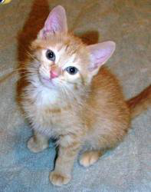

In [4]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [5]:
#Testing the classifier
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

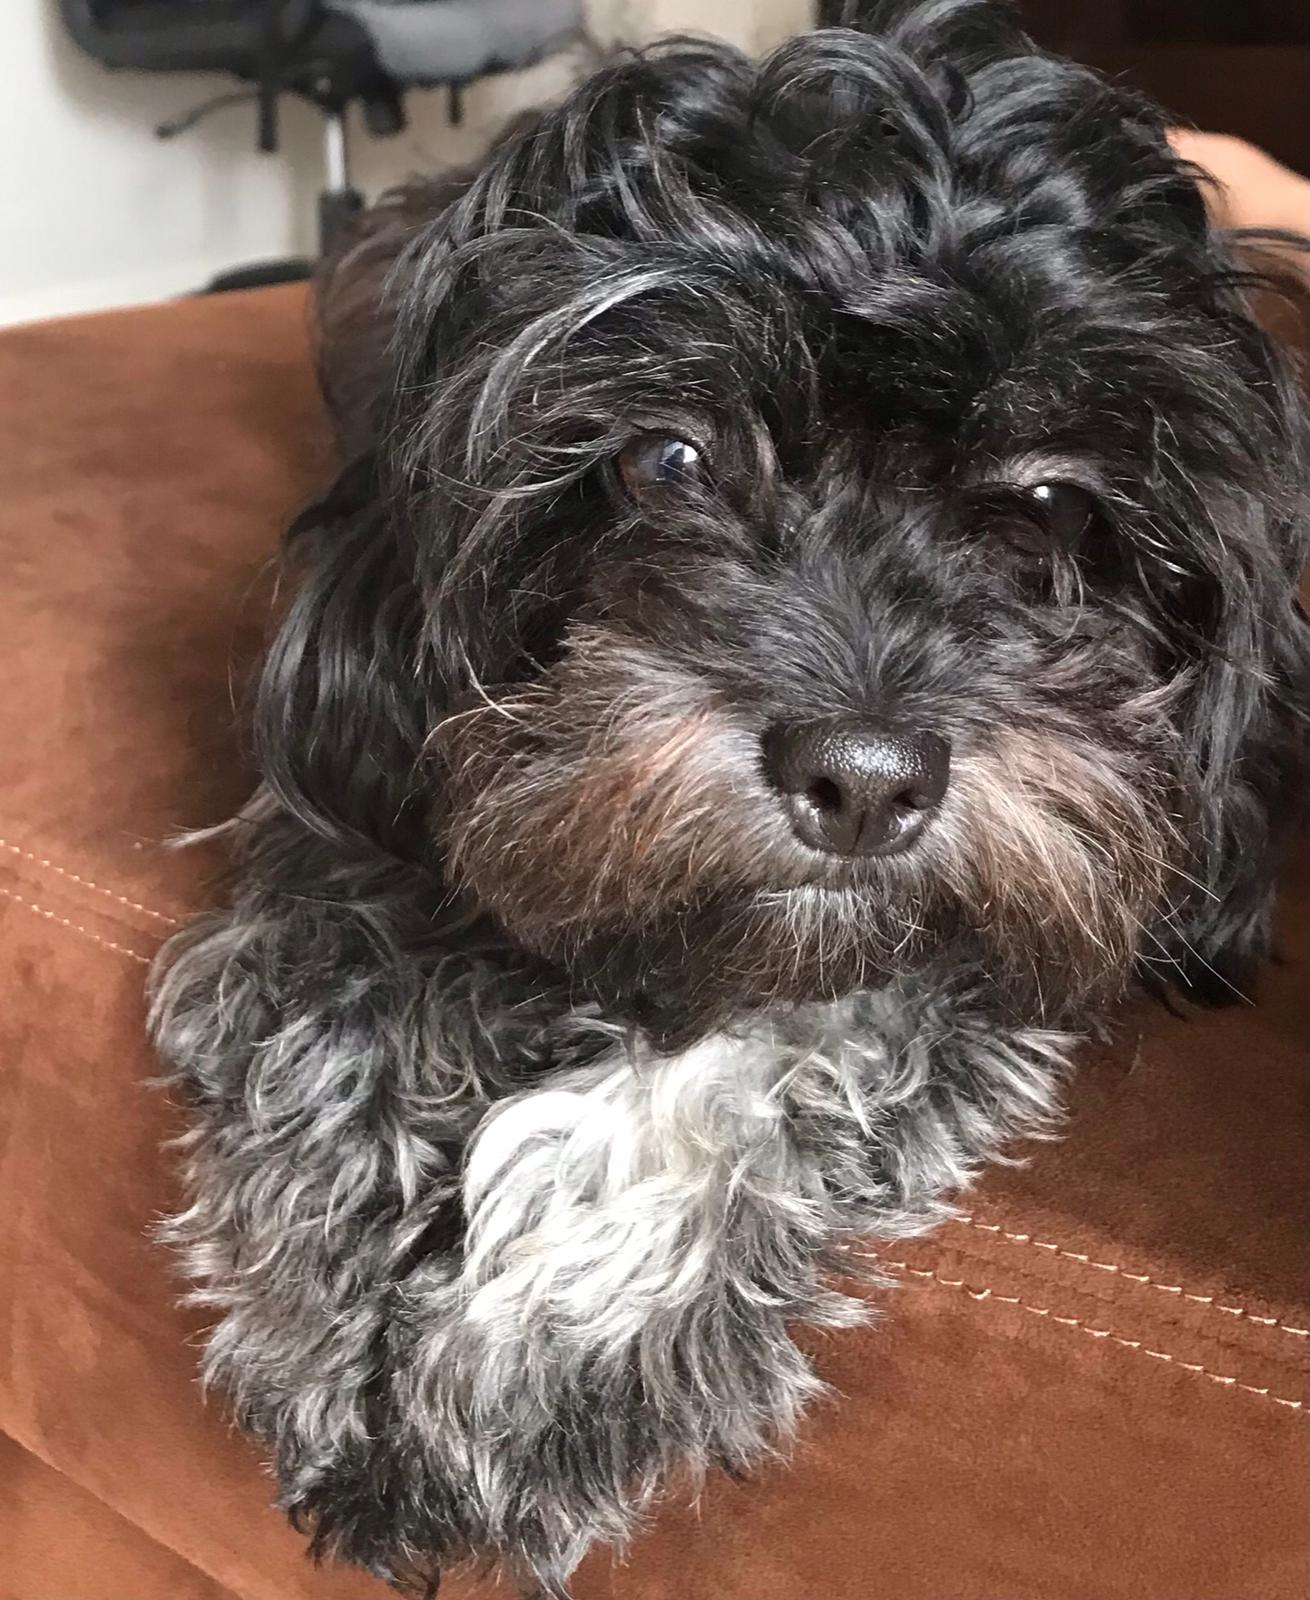

Image of the dog uploaded!

In [9]:
img_self = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img_self)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000064
